In [43]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#! pip install missingno
import missingno as msno 
# !pip install chardet
import chardet


In [44]:
# Leer los primeros 10000 bytes del archivo para detectar la codificación
with open('Terrazas_202104.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))
    print(result)  # Esto mostrará la codificación detectada

{'encoding': 'Johab', 'confidence': 0.99, 'language': 'Korean'}


In [45]:
# leer los datos de Terrazas_202104.csv
terrazas_pd = pd.read_csv('Terrazas_202104.csv', delimiter=';', encoding='ISO-8859-1')
terrazas_pd.sample(10)

,id_terraza,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,id_ndp_edificio,id_clase_ndp_edificio,id_vial_edificio,clase_vial_edificio,desc_vial_edificio,nom_edificio,num_edificio,Cod_Postal,coordenada_x_local,coordenada_y_local,id_tipo_acceso_local,desc_tipo_acceso_local,id_situacion_local,desc_situacion_local,secuencial_local_PC,Escalera,id_planta_agrupado,id_local_agrupado,coordenada_x_agrupacion,coordenada_y_agrupacion,rotulo,id_periodo_terraza,desc_periodo_terraza,id_situacion_terraza,desc_situacion_terraza,Superficie_ES,Superficie_RA,Fecha_confir_ult_decreto_resol,id_ndp_terraza,id_clase_ndp_terraza,ID_VIAL,DESC_CLASE,DESC_NOMBRE,nom_terraza,num_terraza,cal_terraza,desc_ubicacion_terraza,hora_ini_LJ_es,hora_fin_LJ_es,hora_ini_LJ_ra,hora_fin_LJ_ra,hora_ini_VS_es,hora_fin_VS_es,hora_ini_VS_ra,hora_fin_VS_ra,mesas_aux_es,mesas_aux_ra,mesas_es,mesas_ra,sillas_es,sillas_ra
449,688,270298536,21,BARAJAS,2101,ALAMEDA DE OSUNA,11139925,1,729200,CALLE,SOTO HIDALGO ...,NUM,20,28042,"450659,57","4479093,39",1,Puerta Calle,1,Abierto,40,NaN,PB,NaN,NaN,NaN,LA EMBAJADA,2,Estacional,1,Abierta,"32,4",NaN,21/07/2014,11139925,1,729200,CALLE,SOTO HIDALGO ...,NUM,20,,Acera,10:00:00,01:00:00,NaN,NaN,10:00:00,02:30:00,NaN,NaN,0,NaN,10,NaN,40,
5229,17562,10003018,1,CENTRO,104,JUSTICIA,11004328,1,373600,CALLE,INFANTAS ...,NUM,18,28004,"440628,59","4474689,53",1,Puerta Calle,1,Abierto,10,NaN,PB,NaN,NaN,NaN,NO DETERMINADO,1,Anual,1,Abierta,"27,47","27,47",22/05/2020,11004541,1,771000,PLAZA,PEDRO ZEROLO ...,NUM,1,,Plaza peatonal,09:00:00,23:30:00,09:00:00,23:00:00,09:00:00,00:30:00,09:00:00,23:00:00,0,0.0,8,8.0,30,
808,1267,20000314,2,ARGANZUELA,203,CHOPERA,11008916,1,388900,CALLE,JAIME EL CONQUISTADOR ...,NUM,15,28045,"440768,58","4472026,52",1,Puerta Calle,1,Abierto,30,NaN,PB,NaN,NaN,NaN,BAR LAS TINAJAS,1,Anual,1,Abierta,"29,43","29,43",12/01/2015,11008916,1,388900,CALLE,JAIME EL CONQUISTADOR ...,NUM,15,,Acera,10:00:00,01:00:00,10:00:00,00:00:00,10:00:00,02:30:00,10:00:00,00:00:00,0,0.0,10,10.0,30,
641,1011,280042131,10,LATINA,1003,LUCERO,11063571,1,927,CALLE,ALVERJA ...,NUM,12,28011,"436041,62","4472821,56",1,Puerta Calle,1,Abierto,20,NaN,PB,NaN,NaN,NaN,EL RINCÓN DE TONI,1,Anual,1,Abierta,"8,16","8,16",24/10/2014,11063571,1,927,CALLE,ALVERJA ...,NUM,12,,Acera,10:00:00,00:00:00,10:00:00,00:00:00,10:00:00,00:30:00,10:00:00,00:00:00,0,0.0,6,6.0,12,
1149,1773,130001460,13,PUENTE DE VALLECAS,1303,PALOMERAS BAJAS,20081662,1,554750,AVENIDA,PABLO NERUDA ...,NUM,89,28018,"443970,55","4470281,48",1,Puerta Calle,1,Abierto,30,NaN,PB,NaN,NaN,NaN,SIGLO XXI,1,Anual,1,Abierta,"30,2","12,2",20/03/2015,20081662,1,554750,AVENIDA,PABLO NERUDA ...,NUM,89,A,Acera,08:00:00,00:00:00,08:00:00,00:00:00,08:00:00,00:00:00,08:00:00,00:00:00,0,0.0,14,6.0,44,A
3326,5146,270529086,9,MONCLOA-ARAVACA,902,ARGUELLES,11052774,1,295600,CALLE,FERRAZ ...,NUM,53,28008,"438835,61","4475719,55",1,Puerta Calle,1,Abierto,20,NaN,PB,NaN,NaN,NaN,TABERBNA GOURMET,2,Estacional,1,Abierta,"10,23",NaN,17/01/2017,11052774,1,295600,CALLE,FERRAZ ...,NUM,53,,Acera,10:00:00,01:00:00,NaN,NaN,10:00:00,02:30:00,NaN,NaN,0,NaN,4,NaN,13,
6203,18601,270420226,7,CHAMBERI,701,GAZTAMBIDE,11038676,1,376800,CALLE,ISAAC PERAL ...,NUM,4,28015,"439090,61","4476284,54",1,Puerta Calle,1,Abierto,10,NaN,PB,NaN,NaN,NaN,MC DONALDS,1,Anual,1,Abierta,"8,06","8,06",14/04/2021,31049178,1,376800,CALLE,ISAAC PERAL ...,NUM,4,A,Acera,10:00:00,01:00:00,10:00:00,00:00:00,10:00:00,02:30:00,10:00:00,00:00:00,0,0.0,3,3.0,9,
1737,2705,280011965,1,CENTRO,106,SOL,20007114,1,317900,CALLE,FUENTES ...,NUM,6,28013,"439902,59","4474283,53",1,Puerta Calle,1,Abierto,50,NaN,PB,NaN,NaN,NaN,TAQUERIA MI CIUDAD,1,Anual,1,Abierta,"1,28","1,28",15/06/2015,20007120,1,363200,CALLE,HILERAS ...,NUM,5,,Acera,10:00:00,01:00:00,10:00:00,23:00:00,10:00:00,02:30:00,10:00:00,23:00:00,0,0.0,1,1.0,2,
4109,6227,10001057,1,CENTRO,102,EMBAJADORES,11001474,1,743600,CALLE,TOLEDO ...,NUM,51,28005,"439940,59","4473709,53",1,Puerta Calle,1,

In [46]:
terrazas_pd.shape

(6275, 57)

In [47]:
# Dimensiones y tipos de datos del dataset

terrazas_pd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6275 entries, 0 to 6274
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_terraza                      6275 non-null   int64  
 1   id_local                        6275 non-null   int64  
 2   id_distrito_local               6275 non-null   int64  
 3   desc_distrito_local             6275 non-null   object 
 4   id_barrio_local                 6275 non-null   int64  
 5   desc_barrio_local               6275 non-null   object 
 6   id_ndp_edificio                 6275 non-null   int64  
 7   id_clase_ndp_edificio           6275 non-null   int64  
 8   id_vial_edificio                6275 non-null   int64  
 9   clase_vial_edificio             6275 non-null   object 
 10  desc_vial_edificio              6275 non-null   object 
 11  nom_edificio                    6275 non-null   object 
 12  num_edificio                    62

In [48]:
# valores nulos
terrazas_pd.isnull().sum()[terrazas_pd.isnull().sum() > 0]

Escalera                   6272
id_planta_agrupado            8
id_local_agrupado          6178
coordenada_x_agrupacion    6183
coordenada_y_agrupacion    6183
Superficie_RA              1466
hora_ini_LJ_ra             1466
hora_fin_LJ_ra             1466
hora_ini_VS_ra             1466
hora_fin_VS_ra             1466
mesas_aux_ra               1505
mesas_ra                   1505
dtype: int64

In [49]:
# Mostar todas las columnas del dataset
pd.set_option('display.max_columns', None)
terrazas_pd.describe(include='all')


,id_terraza,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,id_ndp_edificio,id_clase_ndp_edificio,id_vial_edificio,clase_vial_edificio,desc_vial_edificio,nom_edificio,num_edificio,Cod_Postal,coordenada_x_local,coordenada_y_local,id_tipo_acceso_local,desc_tipo_acceso_local,id_situacion_local,desc_situacion_local,secuencial_local_PC,Escalera,id_planta_agrupado,id_local_agrupado,coordenada_x_agrupacion,coordenada_y_agrupacion,rotulo,id_periodo_terraza,desc_periodo_terraza,id_situacion_terraza,desc_situacion_terraza,Superficie_ES,Superficie_RA,Fecha_confir_ult_decreto_resol,id_ndp_terraza,id_clase_ndp_terraza,ID_VIAL,DESC_CLASE,DESC_NOMBRE,nom_terraza,num_terraza,cal_terraza,desc_ubicacion_terraza,hora_ini_LJ_es,hora_fin_LJ_es,hora_ini_LJ_ra,hora_fin_LJ_ra,hora_ini_VS_es,hora_fin_VS_es,hora_ini_VS_ra,hora_fin_VS_ra,mesas_aux_es,mesas_aux_ra,mesas_es,mesas_ra,sillas_es,sillas_ra
count,6275.000000,6.275000e+03,6275.000000,6275,6275.000000,6275,6.275000e+03,6275.0,6.275000e+03,6275,6275,6275,6275.000000,6275.000000,6275,6275,6275.000000,6275,6275.000000,6275,6275.000000,3,6267,97,92,92,6275,6275.000000,6275,6275.000000,6275,6275,4809,6275,6.275000e+03,6275.0,6.275000e+03,6275,6275,6275,6275.000000,6275,6275,6275,6275,4809,4809,6275,6275,4809,4809,6275.000000,4770.000000,6275.000000,4770.00000,6275.000000,6275
unique,NaN,NaN,NaN,21,NaN,128,NaN,NaN,NaN,18,1748,1,NaN,NaN,5532,5838,NaN,6,NaN,3,NaN,2,9,72,53,53,5476,NaN,2,NaN,2,2999,2499,1296,NaN,NaN,NaN,18,1704,1,NaN,12,9,14,22,12,16,18,20,13,17,NaN,NaN,NaN,NaN,NaN,12
top,NaN,NaN,NaN,CENTRO,NaN,SOL,NaN,NaN,NaN,CALLE,ALCALA ...,NUM,NaN,NaN,0,0,NaN,Puerta Calle,NaN,Abierto,NaN,1,PB,1,0,0,BAR,NaN,Anual,NaN,Abierta,"19,44","19,44",05/12/2016,NaN,NaN,NaN,CALLE,ALCALA ...,NUM,NaN,,Acera,10:00:00,01:00:00,10:00:00,00:00:00,10:00:00,02:30:00,10:00:00,00:00:00,NaN,NaN,NaN,NaN,NaN,
freq,NaN,NaN,NaN,765,NaN,193,NaN,NaN,NaN,4769,85,6275,NaN,NaN,101,101,NaN,6158,NaN,6203,NaN,2,6233,6,11,11,58,NaN,4712,NaN,6244,83,59,375,NaN,NaN,NaN,4648,93,6275,NaN,5765,4416,4079,3208,3024,2650,4083,2657,3021,2576,NaN,NaN,NaN,NaN,NaN,5828
mean,6502.435857,2.332854e+08,8.302948,NaN,833.837291,NaN,1.375439e+07,1.0,6.211270e+06,NaN,NaN,NaN,42.963506,28022.165737,NaN,NaN,1.000319,NaN,1.044781,NaN,21.768446,NaN,NaN,NaN,NaN,NaN,NaN,1.249084,NaN,1.034582,NaN,NaN,NaN,NaN,1.472731e+07,1.0,6.220813e+06,NaN,NaN,NaN,43.550120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040956,0.038155,9.707092,9.12956,31.628048,NaN
std,5812.332668,8.261088e+07,5.743357,NaN,574.299026,NaN,5.860928e+06,0.0,2.050614e+07,NaN,NaN,NaN,62.251230,15.136546,NaN,NaN,0.328247,NaN,0.463940,NaN,20.602166,NaN,NaN,NaN,NaN,NaN,NaN,0.432517,NaN,0.490830,NaN,NaN,NaN,NaN,6.653664e+06,0.0,2.054970e+07,NaN,NaN,NaN,64.028782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.358528,0.257842,11.353575,7.15089,24.537851,NaN
min,7.000000,1.000000e+07,1.000000,NaN,101.000000,NaN,1.100000e+07,1.0,1.270000e+02,NaN,NaN,NaN,1.000000,28001.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.100000e+07,1.0,1.270000e+02,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,NaN
25%,2462.000000,2.700573e+08,4.000000,NaN,401.000000,NaN,1.101840e+07,1.0,2.138000e+05,NaN,NaN,NaN,8.000000,28009.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.102020e+07,1.0,2.170000e+05,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,5.000000,5.00000,15.500000,NaN
50%,4913.000000,2.703555e+08,7.000000,NaN,704.000000,NaN,1.104649e+07,1.0,4.266850e+05,NaN,NaN,NaN,21.000000,28019.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.106539e+07,1.0,4.273000e+05,NaN,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,8.000000,8.00000,24.000000,NaN
75%,6965.000000,2.800076e+08,13.000000,NaN,1302

<Axes: >

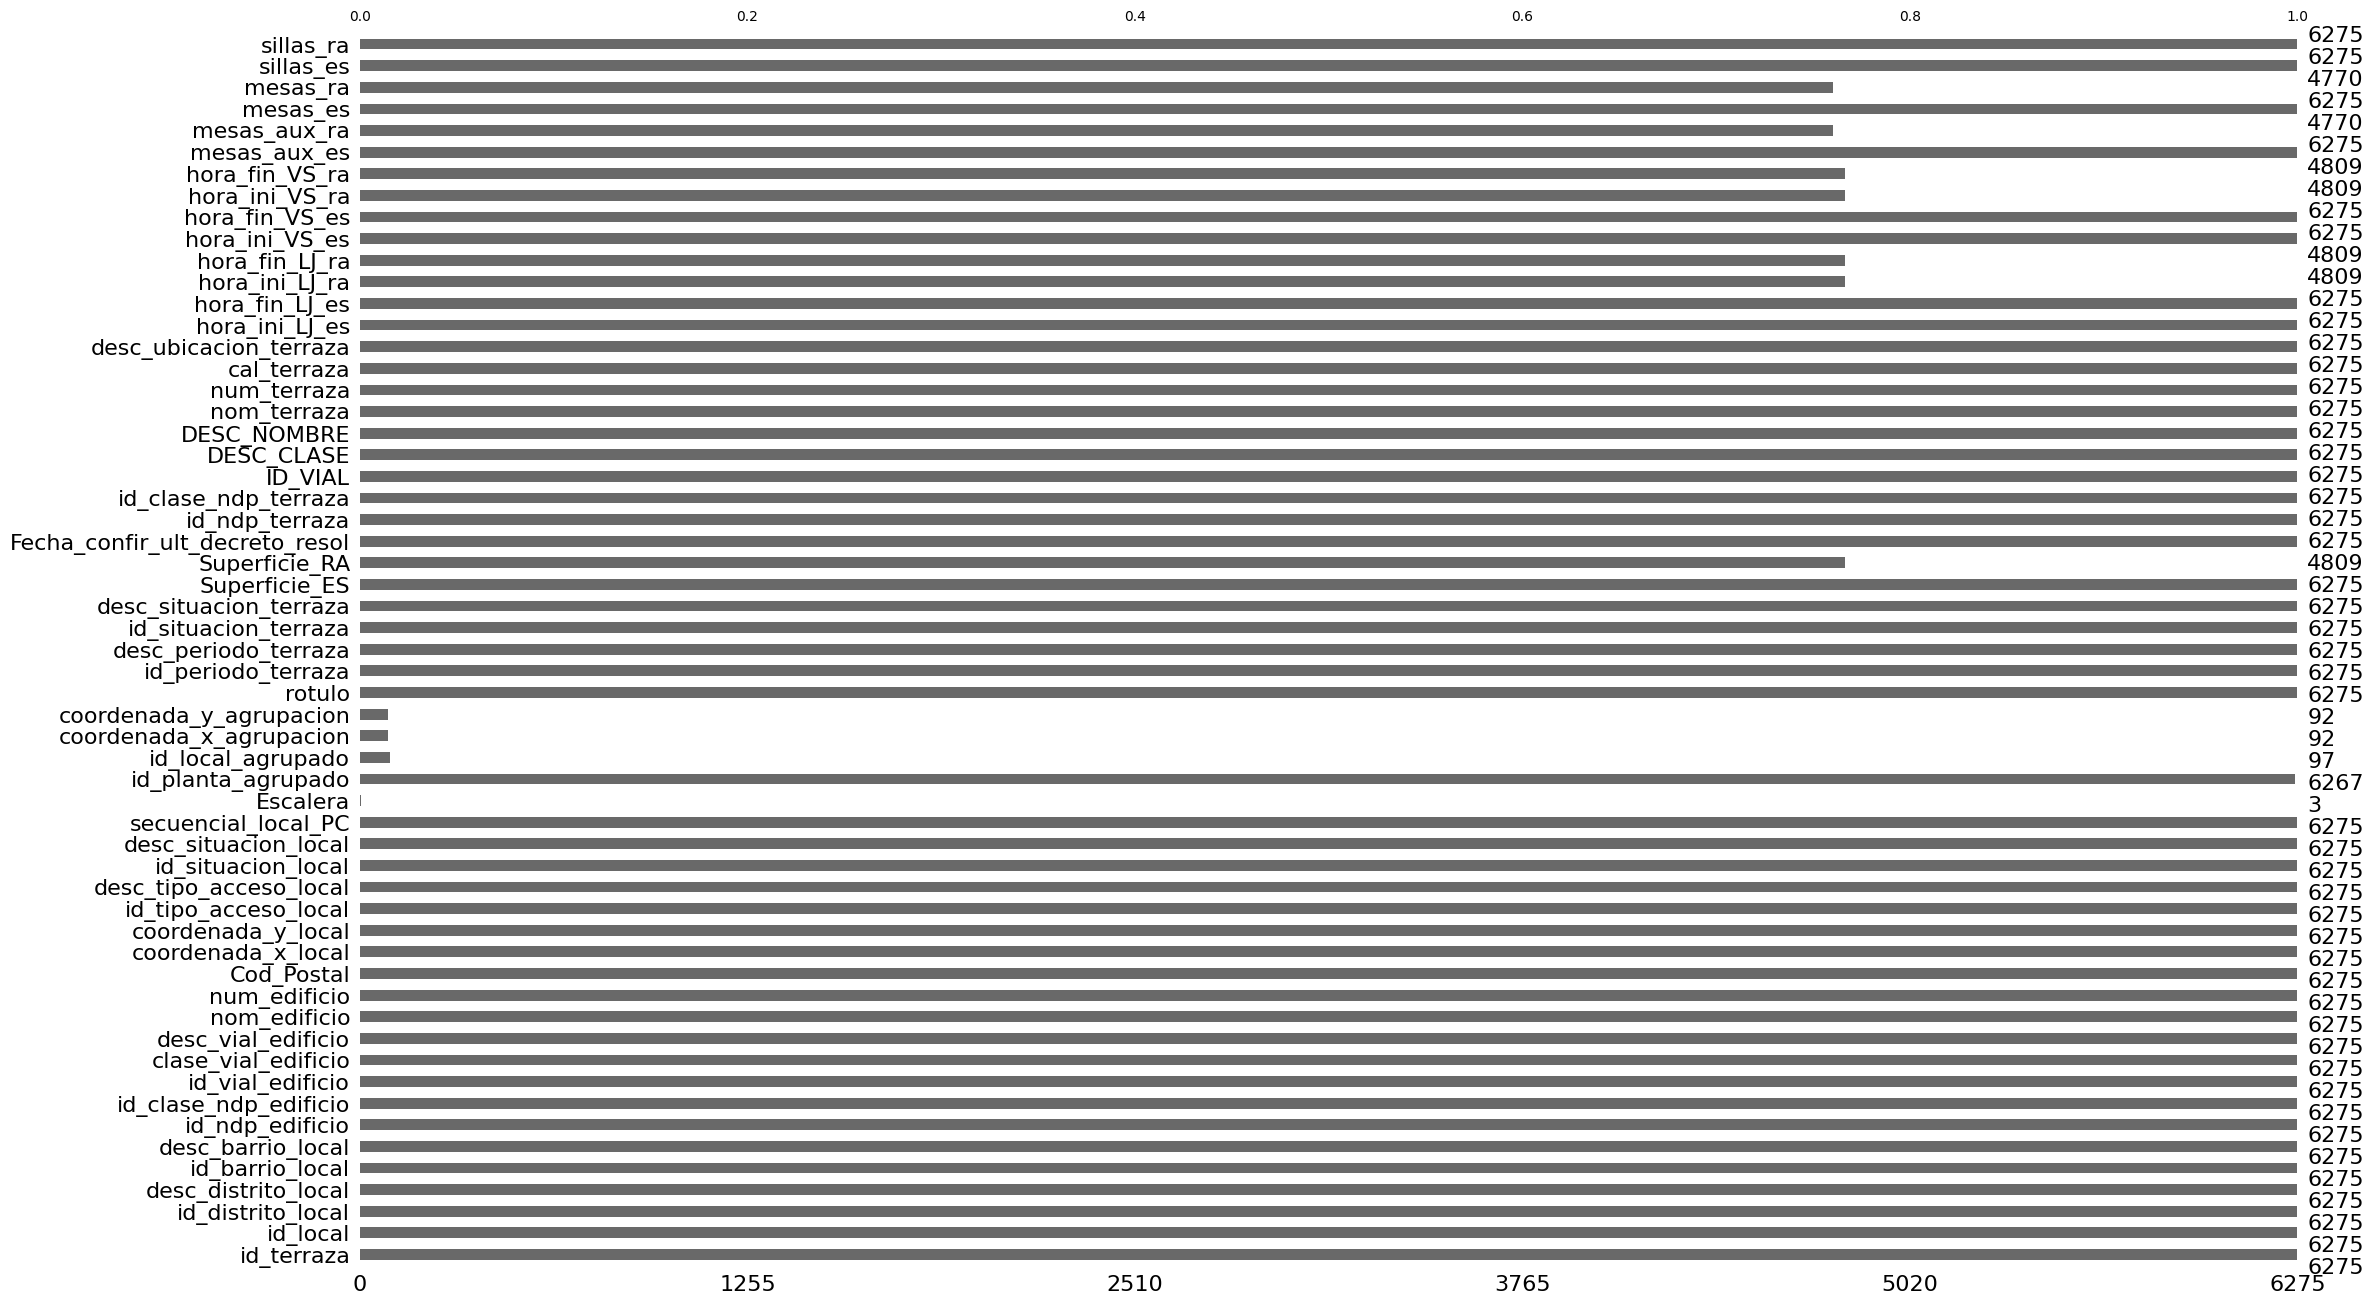

In [50]:
msno.bar(terrazas_pd)

<Axes: >

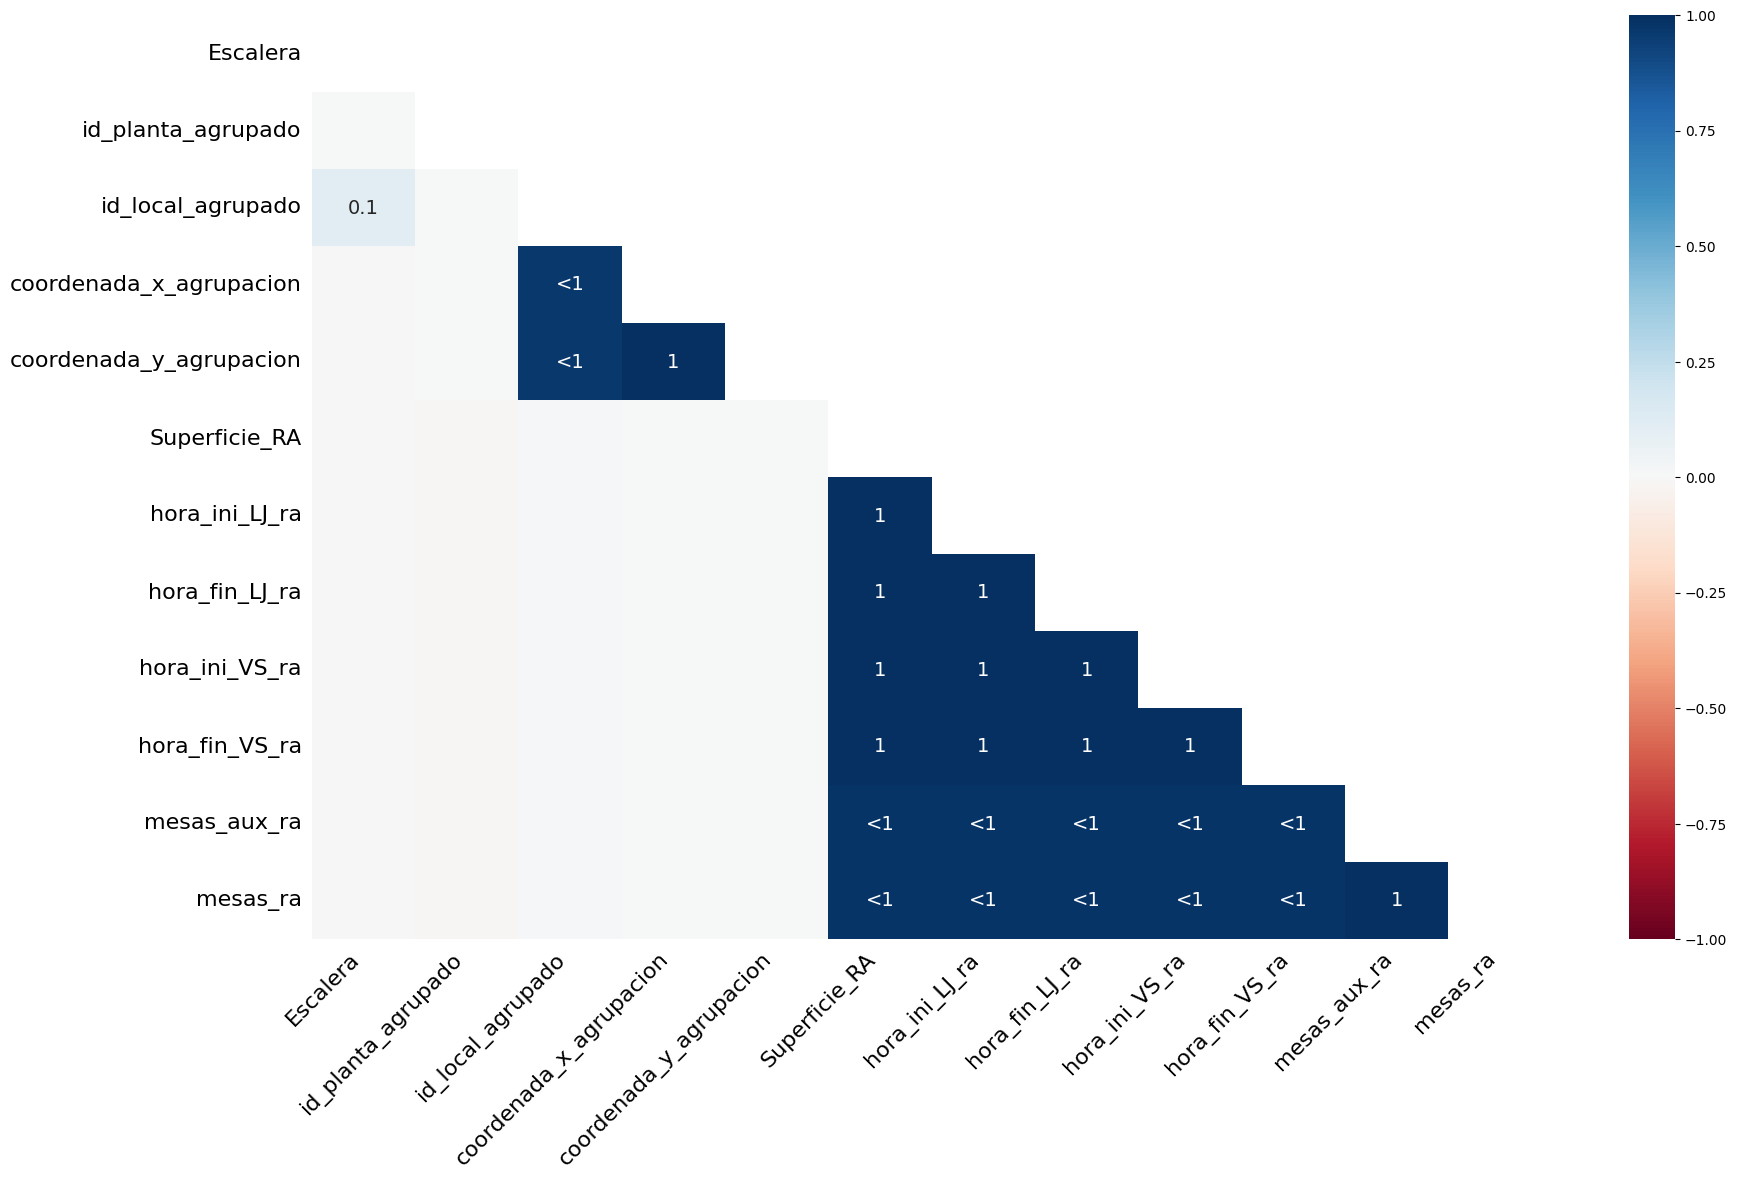

In [51]:
msno.heatmap(terrazas_pd)

<Axes: >

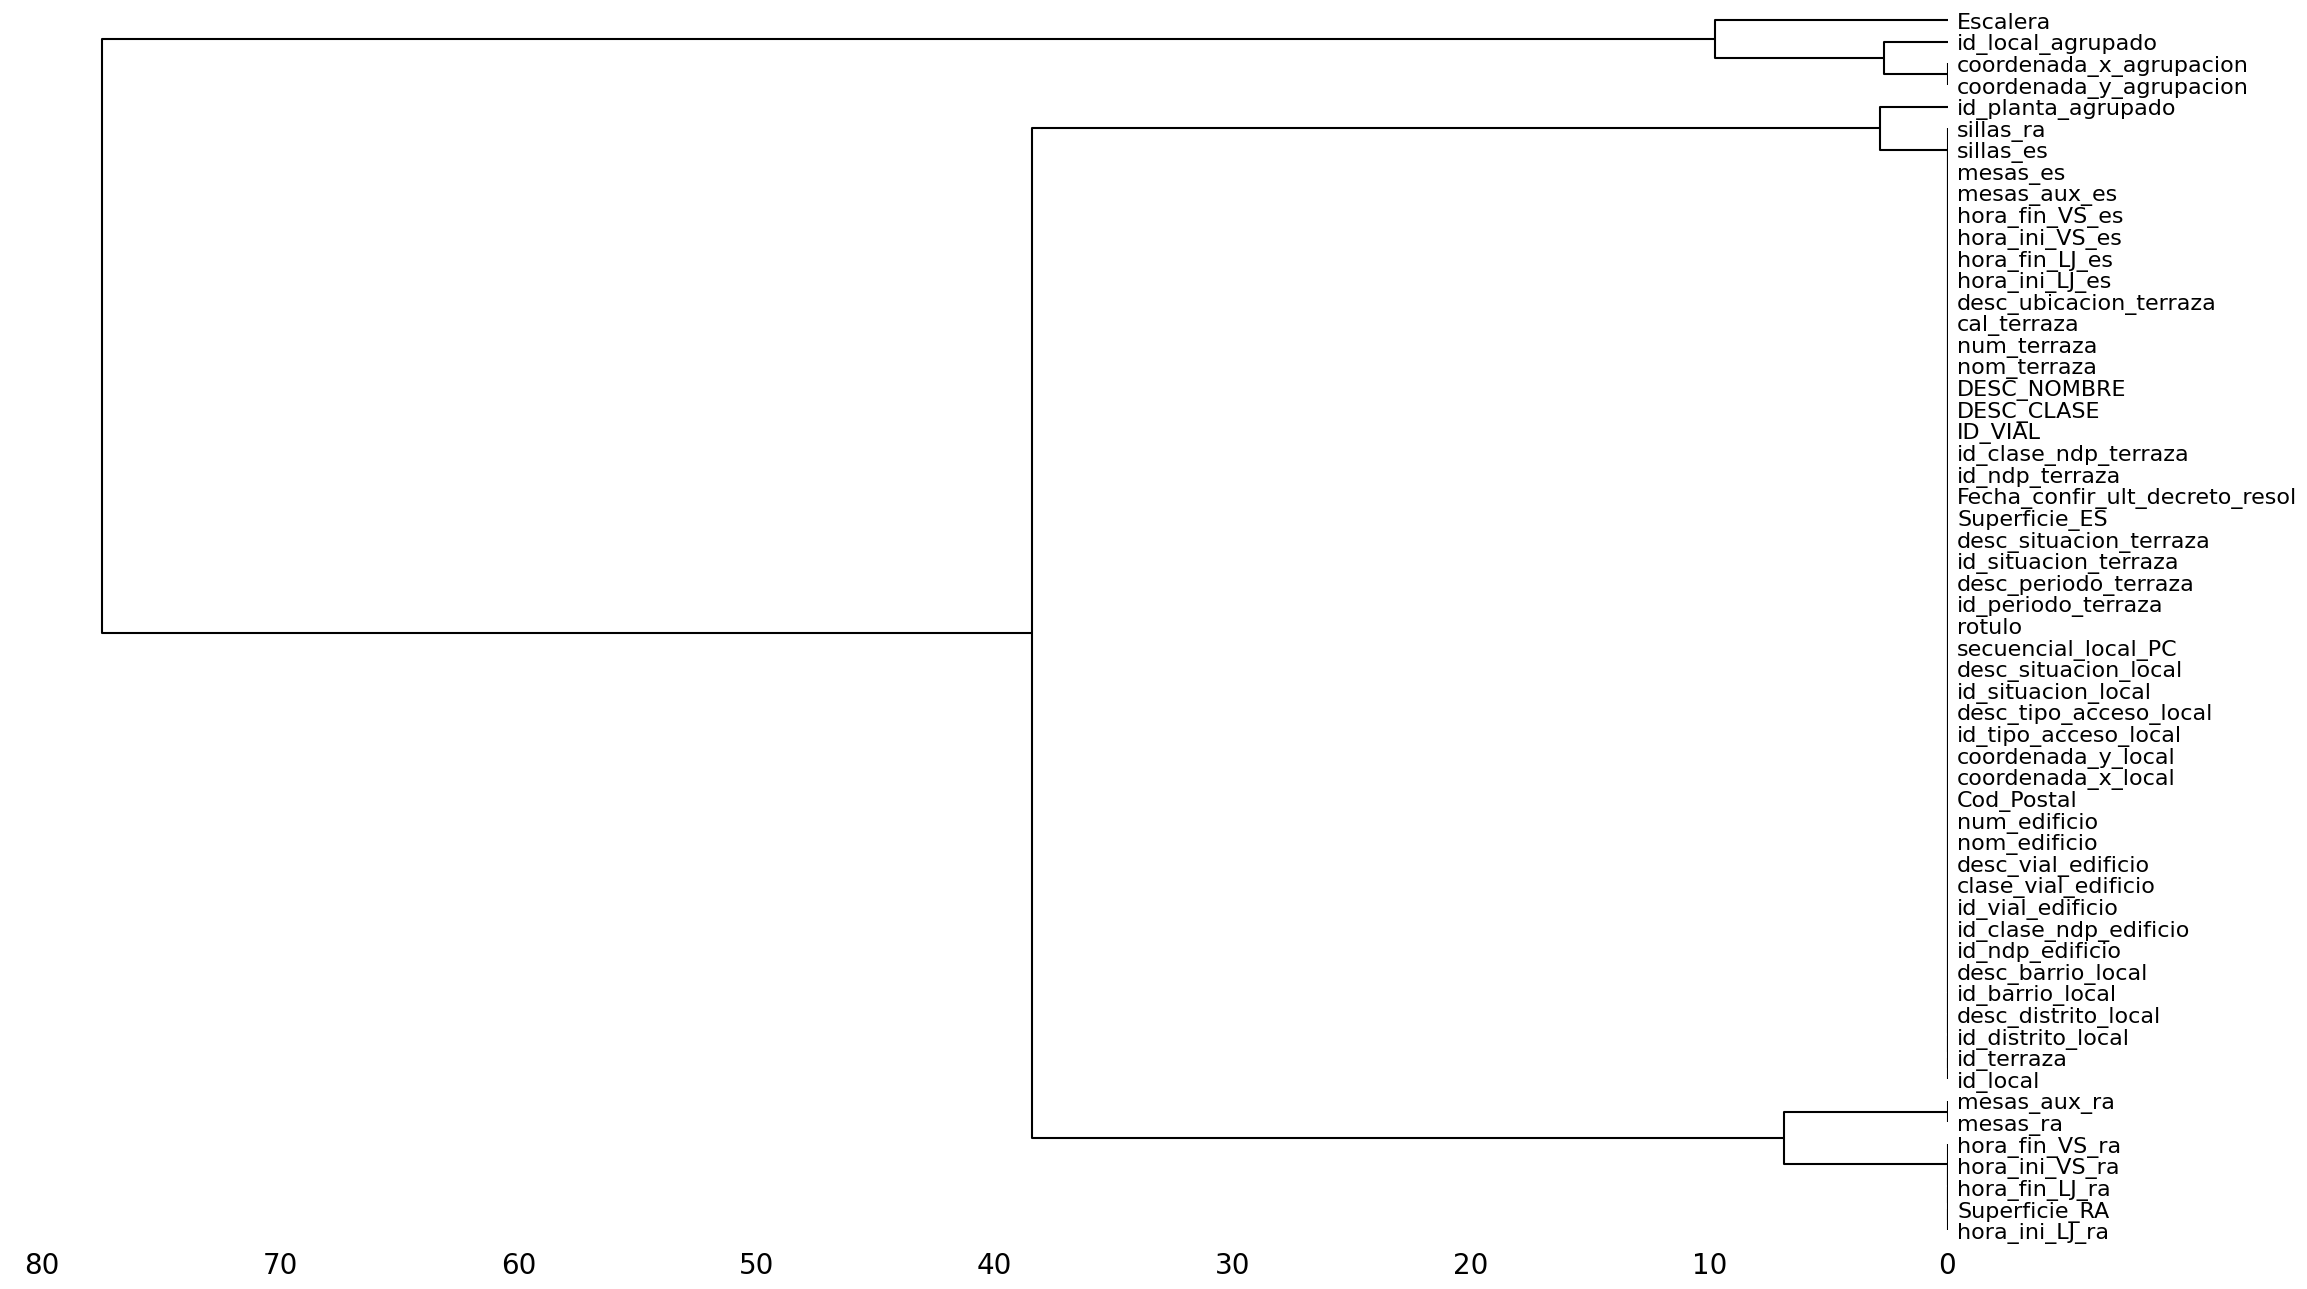

In [52]:
msno.dendrogram(terrazas_pd)

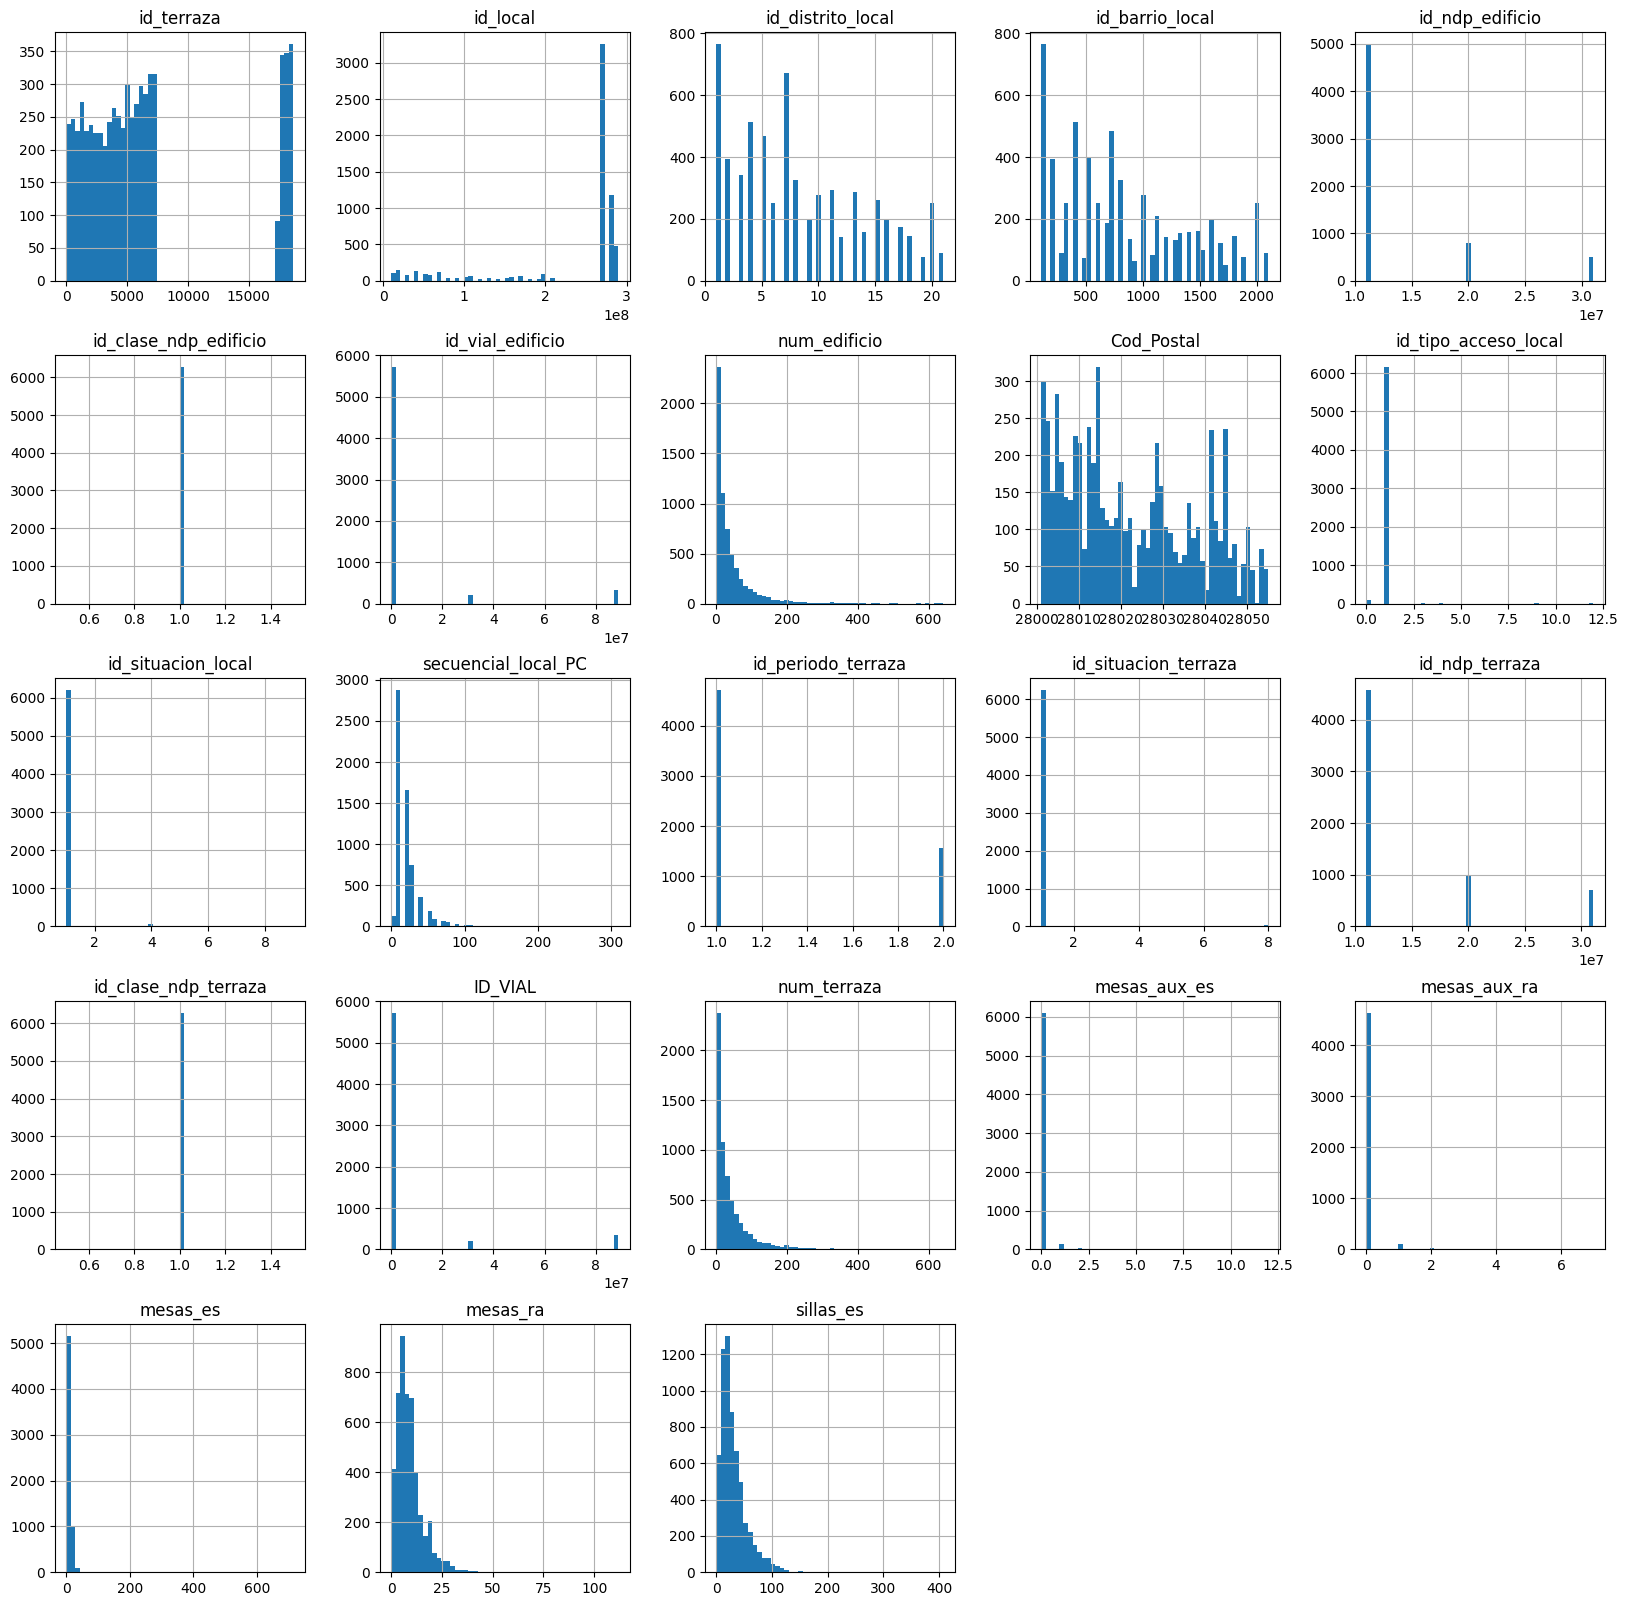

In [53]:
histograma = terrazas_pd.hist(figsize=(20, 20), bins=50)


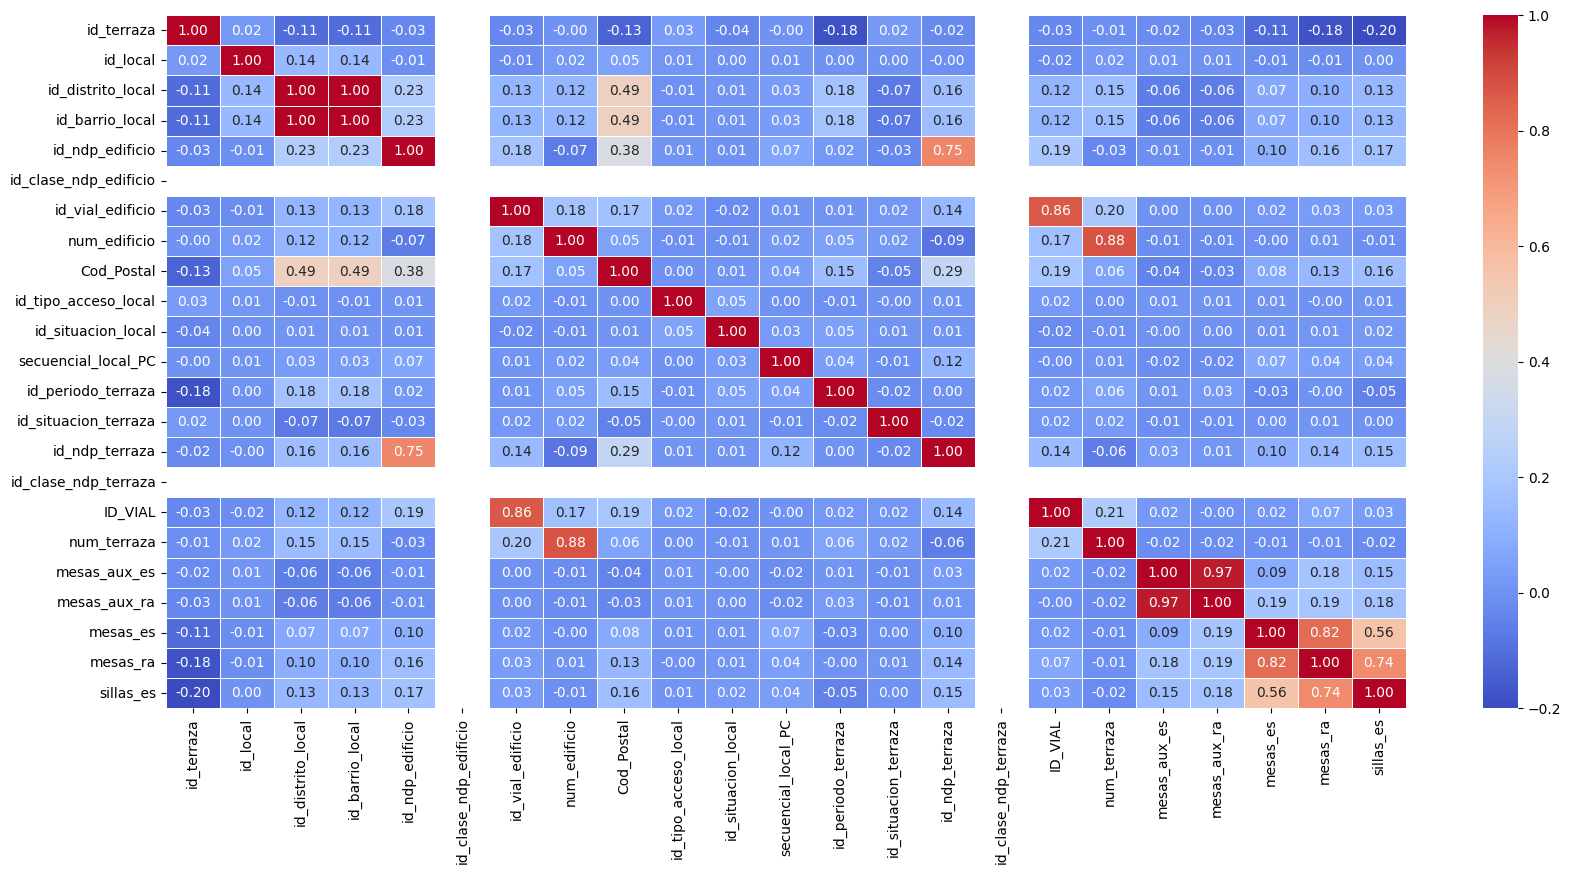

In [54]:
# Filtrar solo columnas numéricas del DataFrame
plt.figure(figsize=(20, 9))
df_numerico = terrazas_pd.select_dtypes(include=['number'])
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', fmt=".2f",linewidth=.5)
plt.show()

In [55]:
# Eliminar columnas sin datos
terrazas_pd_edit = terrazas_pd.drop(['Escalera','id_local_agrupado','coordenada_x_agrupacion',
                                     'coordenada_y_agrupacion'], axis=1)
terrazas_pd_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6275 entries, 0 to 6274
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_terraza                      6275 non-null   int64  
 1   id_local                        6275 non-null   int64  
 2   id_distrito_local               6275 non-null   int64  
 3   desc_distrito_local             6275 non-null   object 
 4   id_barrio_local                 6275 non-null   int64  
 5   desc_barrio_local               6275 non-null   object 
 6   id_ndp_edificio                 6275 non-null   int64  
 7   id_clase_ndp_edificio           6275 non-null   int64  
 8   id_vial_edificio                6275 non-null   int64  
 9   clase_vial_edificio             6275 non-null   object 
 10  desc_vial_edificio              6275 non-null   object 
 11  nom_edificio                    6275 non-null   object 
 12  num_edificio                    62

In [56]:
# Rellenar campos vacios  mesas_ra con 0    
terrazas_pd_edit['mesas_ra'] = terrazas_pd_edit['mesas_ra'].fillna(0)

In [57]:
# Rellenar campo vacios de Superficie_RA con Superficie_ES
terrazas_pd_edit['Superficie_RA'] = terrazas_pd_edit['Superficie_RA'].fillna(terrazas_pd_edit['Superficie_ES'])
# lo mismo con mesas_aux_ra y mesas_aux_es
terrazas_pd_edit['mesas_aux_ra'] = terrazas_pd_edit['mesas_aux_ra'].fillna(terrazas_pd_edit['mesas_aux_es'])
# hora_ini_LJ_ra y hora_ini_LJ_es
terrazas_pd_edit['hora_ini_LJ_ra'] = terrazas_pd_edit['hora_ini_LJ_ra'].fillna(terrazas_pd_edit['hora_ini_LJ_es'])
# hora_fin_LJ_ra y hora_fin_LJ_es
terrazas_pd_edit['hora_fin_LJ_ra'] = terrazas_pd_edit['hora_fin_LJ_ra'].fillna(terrazas_pd_edit['hora_fin_LJ_es'])
# hora_ini_VS_ra y hora_ini_VS_es
terrazas_pd_edit['hora_ini_VS_ra'] = terrazas_pd_edit['hora_ini_VS_ra'].fillna(terrazas_pd_edit['hora_ini_VS_es'])
# hora_fin_VS_ra y hora_fin_VS_es
terrazas_pd_edit['hora_fin_VS_ra'] = terrazas_pd_edit['hora_fin_VS_ra'].fillna(terrazas_pd_edit['hora_fin_VS_es'])

In [58]:
# eliminar filas nulas id_planta_agrupado
terrazas_pd_edit = terrazas_pd_edit.dropna(subset=['id_planta_agrupado'])

In [59]:
terrazas_pd_edit.isnull().sum()[terrazas_pd_edit.isnull().sum() > 0]



Series([], dtype: int64)

In [60]:
terrazas_pd_edit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6267 entries, 0 to 6274
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_terraza                      6267 non-null   int64  
 1   id_local                        6267 non-null   int64  
 2   id_distrito_local               6267 non-null   int64  
 3   desc_distrito_local             6267 non-null   object 
 4   id_barrio_local                 6267 non-null   int64  
 5   desc_barrio_local               6267 non-null   object 
 6   id_ndp_edificio                 6267 non-null   int64  
 7   id_clase_ndp_edificio           6267 non-null   int64  
 8   id_vial_edificio                6267 non-null   int64  
 9   clase_vial_edificio             6267 non-null   object 
 10  desc_vial_edificio              6267 non-null   object 
 11  nom_edificio                    6267 non-null   object 
 12  num_edificio                    6267 no

In [61]:
# transformar Superficie_ES y Superficie_RA en valores numéricos
terrazas_pd_edit['Superficie_ES'] = terrazas_pd_edit['Superficie_ES'].str.replace(',', '.').astype(float)

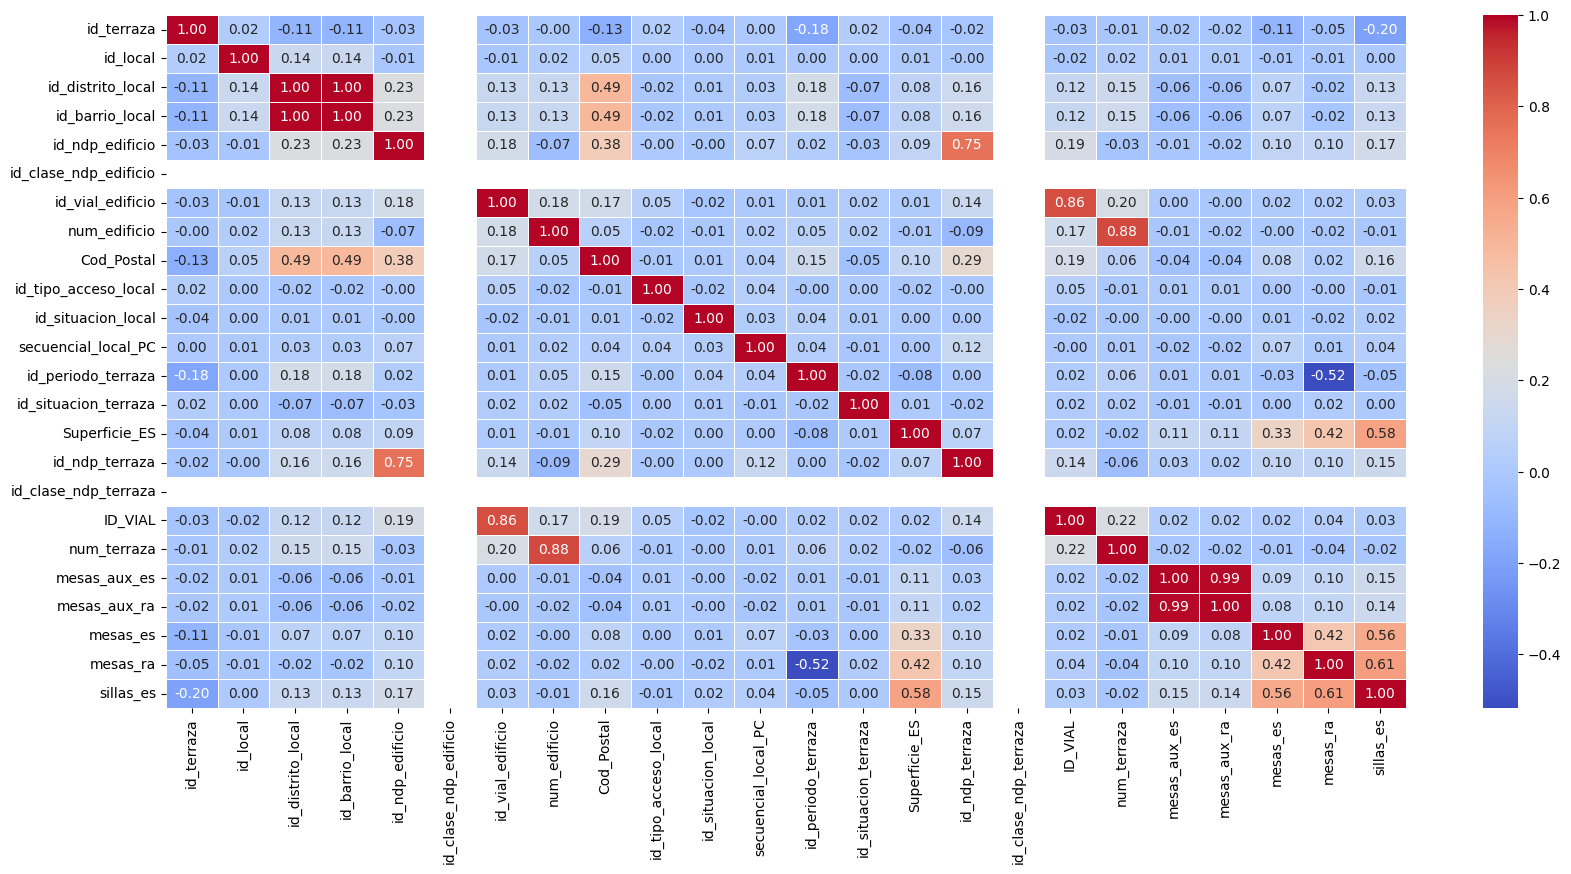

In [62]:
# Filtrar solo columnas numéricas del DataFrame
plt.figure(figsize=(20, 9))
df_numerico = terrazas_pd_edit.select_dtypes(include=['number'])
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', fmt=".2f",linewidth=.5)
plt.show()

In [63]:
# guardar el dataset editado
terrazas_pd_edit.to_csv('Terrazas_202104_edit.csv', index=False)